# 如何创建柱状图

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("ggplot")

## 1. 基础柱状图

柱状图: 用长方形的柱子表示数值的统计图表，又称为条形图。柱状图常用来对比两个以上的数值，适用于较小的数据集。

Matplotlib创建柱状图的接口：$bar(x, height, width, bottom, align, color, orientation)$

* x: 柱子的x轴坐标
* height: 柱子高度，y轴坐标
* width: 柱子宽度，默认0.8
* bottom: 柱子底部的y轴坐标，默认为0
* align: 柱子与x轴坐标的对齐方式，默认'center'
* color: 柱子颜色
* orientation: 柱子方向，'horizontal' or 'vertical'

bar()默认创建垂直柱状图，barh()可创建水平柱状图，原理基本一致。

Text(0.5, 1.0, 'Simple Bar Plot')

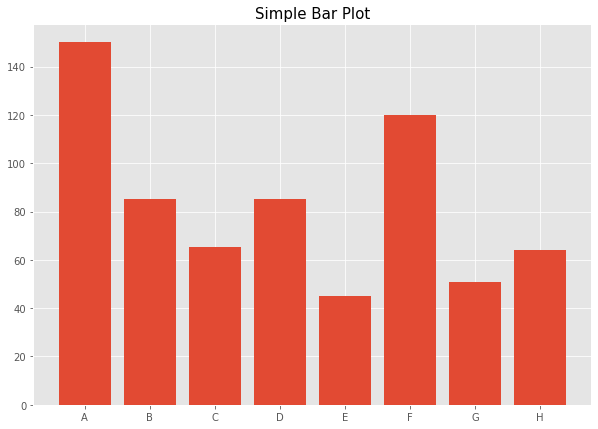

In [3]:
# 虚拟数据
x = ["A", "B", "C", "D", "E", "F", "G", "H"]
y = [150, 85.2, 65.2, 85, 45, 120, 51, 64]

# 柱状图和散点图不同，散点图的(x,y)均为数值变量
# 柱状图的x轴显示分类变量，有两种处理方式
# 方式1：自己创建x轴坐标，并提供对应的标签
# 方式2：让Matplotlib自动完成映射

# 方式1
# xticks = np.arange(len(x))  # 每根柱子的x轴坐标
# xlabels = x  # 每根柱子的标签
# fig, ax = plt.subplots(figsize=(10, 7))
# ax.bar(x=xticks, height=y, tick_label=xlabels)

# 方式2（推荐）
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(x=x, height=y)
ax.set_title("Simple Bar Plot", fontsize=15)

## 2. 调整样式

Matplotlib创建图表的优势在于，用户可以定制每一个细节，接下来调整柱状图的样式，包括改变柱子的宽度，对齐方式和颜色，以及如何把数值添加到图表中。

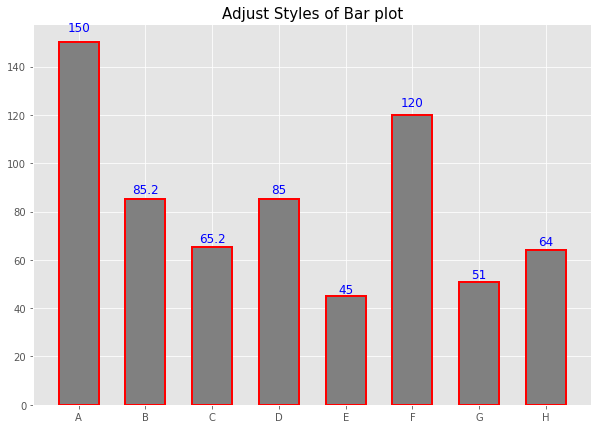

In [4]:
x = ["A", "B", "C", "D", "E", "F", "G", "H"]
y = [150, 85.2, 65.2, 85, 45, 120, 51, 64]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(
    x=x,  # Matplotlib自动将非数值变量转化为x轴坐标
    height=y,  # 柱子高度，y轴坐标
    width=0.6,  # 柱子宽度，默认0.8，两根柱子中心的距离默认为1.0
    align="center",  # 柱子的对齐方式，'center' or 'edge'
    color="grey",  # 柱子颜色
    edgecolor="red",  # 柱子边框的颜色
    linewidth=2.0  # 柱子边框线的大小
)
ax.set_title("Adjust Styles of Bar plot", fontsize=15)

# 一个常见的场景是：每根柱子上方添加数值标签
# 步骤：
# 1. 准备要添加的标签和坐标
# 2. 调用ax.annotate()将文本添加到图表
# 3. 调整样式，例如标签大小，颜色和对齐方式
xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(
        s=s,  # 要添加的文本
        xy=xy,  # 将文本添加到哪个位置
        fontsize=12,  # 标签大小
        color="blue",  # 标签颜色
        ha="center",  # 水平对齐
        va="baseline"  # 垂直对齐
    )

## 3. 堆积柱状图

有时候想在同一根柱子上显示两个不同的数值，即所谓堆积柱状图(stacked bar chart)。

假设一个场景，有6家门店，每家门店都销售三种产品，用堆积柱状图显示每家门店三种产品的销量。

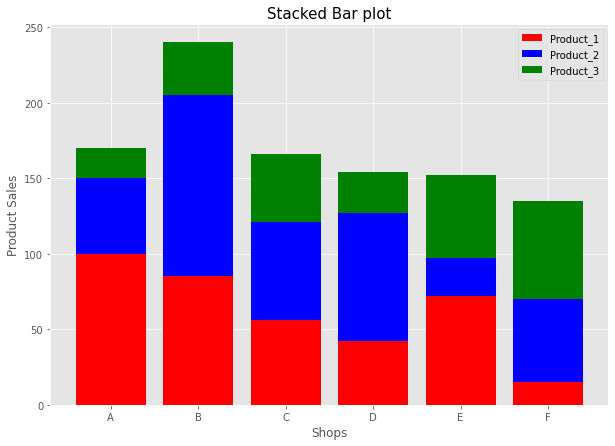

In [5]:
shops = ["A", "B", "C", "D", "E", "F"]
sales_product_1 = [100, 85, 56, 42, 72, 15]
sales_product_2 = [50, 120, 65, 85, 25, 55]
sales_product_3 = [20, 35, 45, 27, 55, 65]

fig, ax = plt.subplots(figsize=(10, 7))
# 先创建一根柱子，显示第一种产品的销量
ax.bar(shops, sales_product_1, color="red", label="Product_1")
# 第二根柱子“堆积”在第一根柱子上方，通过'bottom'调整，显示第二种产品的销量
ax.bar(shops, sales_product_2, color="blue", bottom=sales_product_1, label="Product_2")
# 第三根柱子“堆积”在第二根柱子上方，通过'bottom'调整，显示第三种产品的销量
ax.bar(shops, sales_product_3, color="green", 
       bottom=np.array(sales_product_2) + np.array(sales_product_1), label="Product_3")

ax.set_title("Stacked Bar plot", fontsize=15)
ax.set_xlabel("Shops")
ax.set_ylabel("Product Sales")
ax.legend()

## 4. 分组柱状图

分组柱状图的原理跟堆积柱状图类似，但柱子不再是堆叠在一起，而是在相同的X轴标签上分成几根更窄的柱子，这些柱子都属于同一个组。

沿用上面的案例。

[Text(0, 0, 'A'),
 Text(0, 0, 'B'),
 Text(0, 0, 'C'),
 Text(0, 0, 'D'),
 Text(0, 0, 'E'),
 Text(0, 0, 'F')]

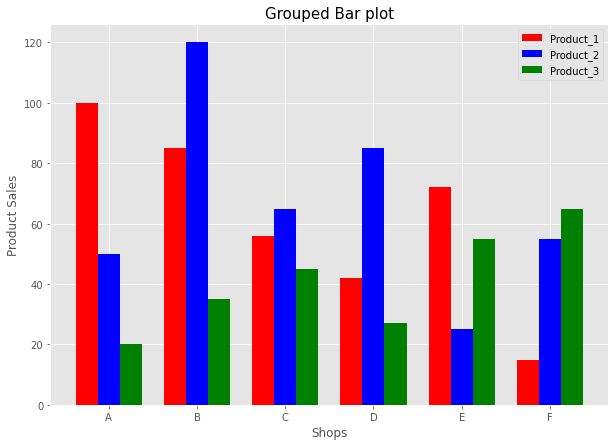

In [6]:
shops = ["A", "B", "C", "D", "E", "F"]
sales_product_1 = [100, 85, 56, 42, 72, 15]
sales_product_2 = [50, 120, 65, 85, 25, 55]
sales_product_3 = [20, 35, 45, 27, 55, 65]

# 创建分组柱状图，需要自己控制x轴坐标
xticks = np.arange(len(shops))

fig, ax = plt.subplots(figsize=(10, 7))
# 所有门店第一种产品的销量，注意控制柱子的宽度，这里选择0.25
ax.bar(xticks, sales_product_1, width=0.25, label="Product_1", color="red")
# 所有门店第二种产品的销量，通过微调x轴坐标来调整新增柱子的位置
ax.bar(xticks + 0.25, sales_product_2, width=0.25, label="Product_2", color="blue")
# 所有门店第三种产品的销量，继续微调x轴坐标调整新增柱子的位置
ax.bar(xticks + 0.5, sales_product_3, width=0.25, label="Product_3", color="green")

ax.set_title("Grouped Bar plot", fontsize=15)
ax.set_xlabel("Shops")
ax.set_ylabel("Product Sales")
ax.legend()

# 最后调整x轴标签的位置
ax.set_xticks(xticks + 0.25)
ax.set_xticklabels(shops)